<a href="https://colab.research.google.com/github/YoooonaLee/machine_learning/blob/main/%EC%95%84%EB%8B%AC%EB%A6%B0_%26_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA



In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Iris 데이터셋 불러오기
iris = load_iris()

# 데이터셋을 판다스 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris.data,   columns=iris.feature_names)


iris_df['label'] = iris.target


binary_df = iris_df[iris_df['label'].isin([0, 1])]


X = binary_df[iris.feature_names]
y = binary_df['label']


#트레인 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# 스케일 적용 (훈련 데이터에 fit하고, 동일한 스케일을 테스트 데이터에 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # X_train에 스케일 적용
X_test_scaled = scaler.transform(X_test)        # X_train의 스케일 정보로 X_test 스케일 적용


#내용정리

아달린 vs 퍼셉트론 (둘다 이진분류)

결국엔 threshold를 가중치를 업데이트하는 트레이닝 과정에 사용하냐 안하냐가 가장 큰차이


▶퍼셉트론은 threshold함수를 지난 예측라벨값 자체를 이용해서 실제 라벨값과의 오차를 구했기 때문에 오차값 (y-y^)값 자체가 binary

 => 따라서 정교한 오차update는 힘들다


▶하지만 아달린은 활성화함수(항등함수)를 거친다음에 원래의 가중치값과 실제 레이블값의 오차를 구하기 때문에 보다 정교하게 update할 수 있다.
그리고 퍼셉트론과 다르게 threshold는 마지막 클래스 분류할 때만 사용함.

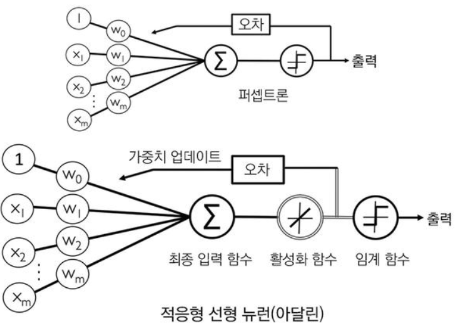

#Adaline(Adaptive linear neuron)을 사용한 붓꽃 데이터 분류

In [ ]:
X_train #test size =0.2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4
52,6.9,3.1,4.9,1.5
60,5.0,2.0,3.5,1.0
66,5.6,3.0,4.5,1.5
68,6.2,2.2,4.5,1.5
...,...,...,...,...
17,5.1,3.5,1.4,0.3
36,5.5,3.5,1.3,0.2
85,6.0,3.4,4.5,1.6
21,5.1,3.7,1.5,0.4


In [ ]:
y_train

,label
15,0
52,1
60,1
66,1
68,1
...,...
17,0
36,0
85,1
21,0


In [ ]:
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=30):
        self.eta = eta        # 학습률
        self.n_iter = n_iter  # 반복 횟수

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  # 가중치 초기화 (X 피처 + bias)
        self.cost_ = []  # 비용 함수 값 저장

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output  #실제 레이블값 - 항등함수를 거친 z값
            self.w_[1:] += self.eta * X.T.dot(errors) #⭐
            #  Δw_j = η*Σ(y_i -  z_i) x_ij  (비용함수 SSE,J(w)의 편도함수에 학습률을 곱한값인 Δw_j를 각각의 가중치에 업데이트)
            #   w_j := w_j + Δw_j
            #  행렬 연산 결과는 각 각  w1,w2,w3,w4에대한 기울기 값들의 배열?
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0   # SSE  cost function
            self.cost_.append(cost)          # 각각 에포크마다 loss check
        return self




    def net_input(self, X):
        """가중합 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
        #업데이트 된 weight들을 가지고 가중합 계산

    def activation(self, X):
        """항등 함수: ADALINE은 선형 활성화 함수 사용"""
        return X

    def predict(self, X):
        """클래스 레이블 반환"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        #마지막 예측할 때만!!! threshold 적용해서 레이블 반환

learning rate=0.2  정확도는 0.00%
learning rate=0.02  정확도는 0.00%
learning rate=0.002  정확도는 0.00%
learning rate=0.0002  정확도는 50.00%
learning rate=2e-05  정확도는 50.00%


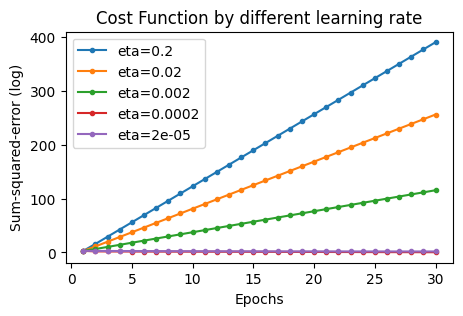

In [ ]:

eta_list = [0.2, 0.02, 0.002,0.0002,0.00002]
plt.figure(figsize=(5,3))

# 각각의 학습률에 대해 그래프 그리기
for eta_value in eta_list:
    adaline = AdalineGD(eta=eta_value, n_iter=30)
    adaline.fit(X_train, y_train)
    plt.plot(range(1, 31), np.log(adaline.cost_), marker='.', label=f'eta={eta_value}')
    y_pred = adaline.predict(X_test) #테스트 레이블을 가지고 예측
    print(f"learning rate={eta_value}  정확도는 {accuracy_score(y_test, y_pred) * 100:.2f}%")

plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error (log)')
plt.title('Cost Function by different learning rate')
plt.legend()
plt.show()


learning rate를 0.002까지 줄였을 때 에포크마다 오차값이 오히려 커짐

그 미만 learning rate(빨강색,보라색) 그래프 개형 확인 필요

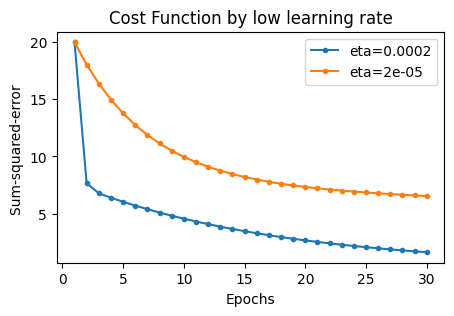

In [ ]:
low_eta_list=[0.0002,0.00002]
plt.figure(figsize=(5,3))

for eta_value in low_eta_list:
    adaline = AdalineGD(eta=eta_value, n_iter=30)
    adaline.fit(X_train, y_train)
    plt.plot(range(1, 31), adaline.cost_, marker='.', label=f'eta={eta_value}')

plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error ')
plt.title('Cost Function by low learning rate')
plt.legend()
plt.show()

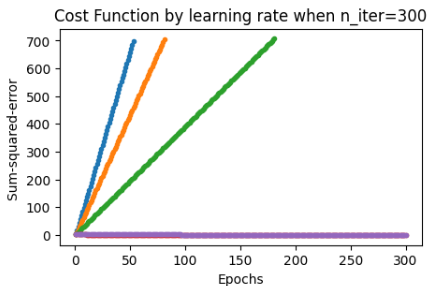

##📑

▶학습률이 크면 cost function이 epoch가 증가할 때마다 커져버림.


아마도 global minimum에 정착 못하고 diverse된 결과치.




▶학습률이 작을 경우엔... epoch가 증가함에 따라 SSE값이 감소하는 개형은 확인됨.

 하지만 너무 학습률, 학습양?이 적어서 global minimum에 정착하려면 에포크 수가 많이 필요함.


#Logistic Regression(로지스틱 회귀)를 사용한 붓꽃 데이터 분류


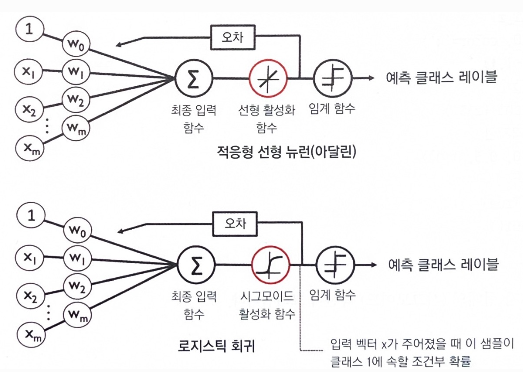

🖊로지스틱 회귀 => **확률**을 모델링하는 알고리즘임


 회귀지만 기본적으로 이진분류 모델 =>  
 결과가 확률로 나와서,그 확률값을 가지고  0 or 1로 분류를 함.


🖊그래서 선형방정식(z=w^tx+...)을 인풋값으로 받아서



  0~1사이의 확률값을 반환해주는 ⭐시그모이드함수 (활성함수)가 꼭 필요함을 기억

  (여기서 확률 p를 선형방정식으로 변환해주는 step이 logit 변환.)

##로지스틱 회귀의 비용함수
log likelihood의 negative값을 사용

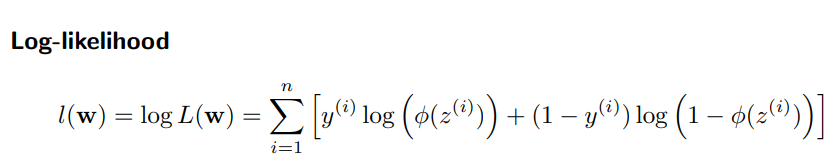

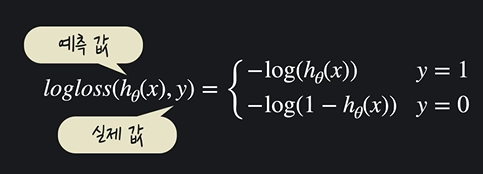

##로지스틱 회귀 비용함수의 편도함수

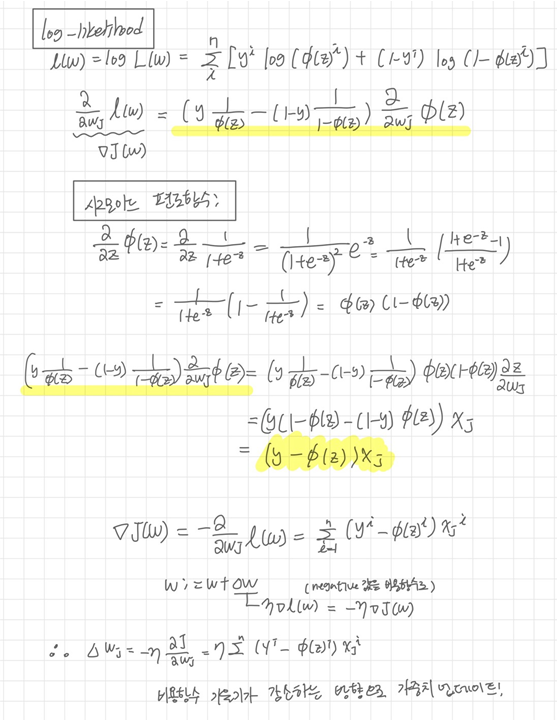

In [ ]:
from sklearn.linear_model import LogisticRegression
#시그모이드 함수를 통해 비선형적인 확률 값을 반환하지만,
#선형 회귀 모델을 기반으로 동작


logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = logistic_model.predict(X_test) # 0.5 이상이면 1, 0.5 미만이면 0으로 분류

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression 정확도: {accuracy * 100:.2f}%")

Logistic Regression 정확도: 100.00%


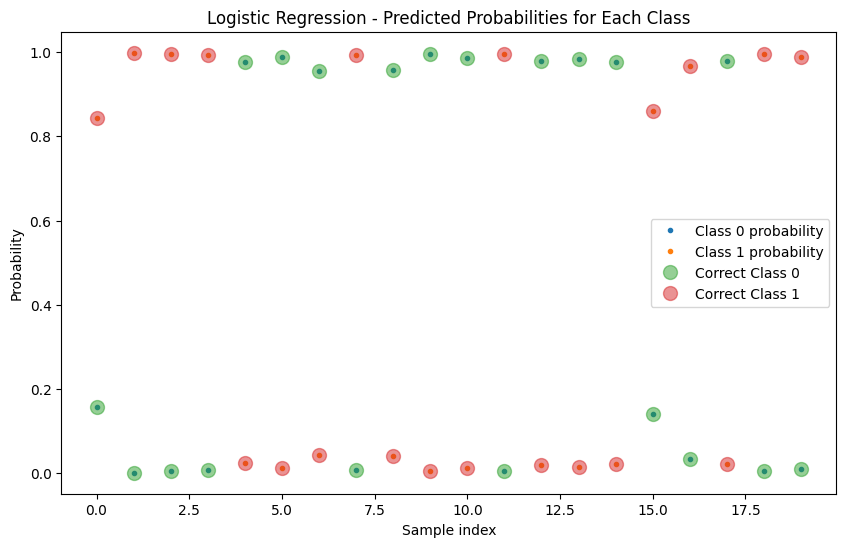

In [ ]:
import matplotlib.pyplot as plt

# 각 샘플이 각 클래스에 속할 확률을 반환
y_prob = logistic_model.predict_proba(X_test)

# 예측 레이블 (클래스 0 또는 1)과 실제 레이블 비교
y_pred = logistic_model.predict(X_test)  # 예측 레이블
y_true = y_test  # 실제 레이블

# 테스트 데이터에 대한 예측 확률 시각화
plt.figure(figsize=(10, 6))

# 각 클래스별 확률을 플로팅
for i in range(y_prob.shape[1]):
    plt.plot(y_prob[:, i], marker='.', label=f'Class {i} probability', linestyle='')

# 예측이 실제 레이블과 일치하는 데이터에 동그라미 표시
correct_predictions = (y_pred == y_true)  # 예측이 맞은 샘플의 인덱스

# 예측이 맞은 샘플에만 원형 마커를 추가
for i in range(y_prob.shape[1]):
    plt.plot([idx for idx, correct in enumerate(correct_predictions) if correct],
             [y_prob[idx, i] for idx, correct in enumerate(correct_predictions) if correct],
             'o', markersize=10, label=f'Correct Class {i}', alpha=0.5)

plt.xlabel('Sample index')
plt.ylabel('Probability')
plt.title('Logistic Regression - Predicted Probabilities for Each Class')
plt.legend()
plt.show()



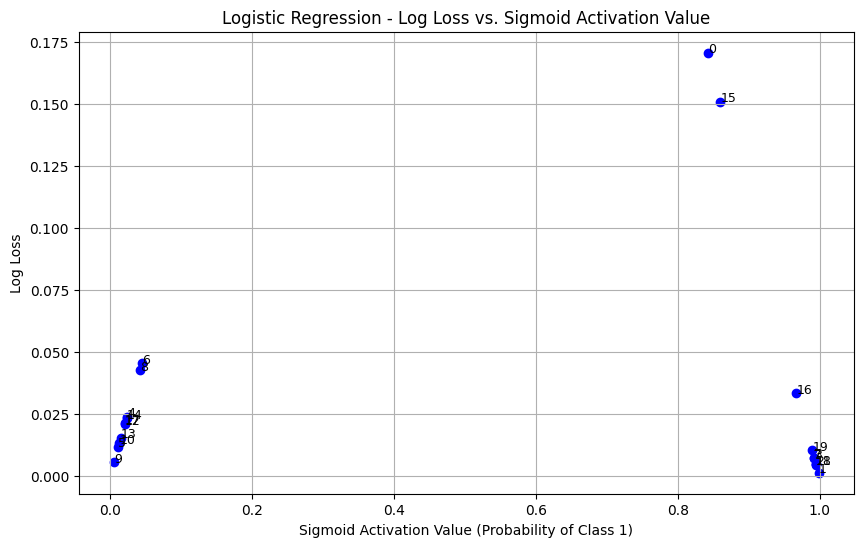

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


# 테스트 데이터에 대한 확률과 예측
y_prob = logistic_model.predict_proba(X_test)[:, 1]  # 클래스 1의 확률
y_pred = logistic_model.predict(X_test)

# 로그 손실 계산
log_losses = [log_loss([true], [pred_prob], labels=[0, 1]) for true, pred_prob in zip(y_test, y_prob)]

# 그래프 출력
plt.figure(figsize=(10, 6))
plt.scatter(y_prob, log_losses, color='blue')
for i, (prob, loss) in enumerate(zip(y_prob, log_losses)):
    plt.text(prob, loss, f'{i}', fontsize=9)
plt.xlabel('Sigmoid Activation Value (Probability of Class 1)')
plt.ylabel('Log Loss')
plt.title('Logistic Regression - Log Loss vs. Sigmoid Activation Value')
plt.grid(True)
plt.show()


In [ ]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
57,4.9,2.4,3.3,1.0
77,6.7,3.0,5.0,1.7
63,6.1,2.9,4.7,1.4
51,6.4,3.2,4.5,1.5
7,5.0,3.4,1.5,0.2
14,5.8,4.0,1.2,0.2
20,5.4,3.4,1.7,0.2
75,6.6,3.0,4.4,1.4
18,5.7,3.8,1.7,0.3
22,4.6,3.6,1.0,0.2


In [ ]:
y_test

,label
57,1
77,1
63,1
51,1
7,0
14,0
20,0
75,1
18,0
22,0


In [ ]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4
52,6.9,3.1,4.9,1.5
60,5.0,2.0,3.5,1.0
66,5.6,3.0,4.5,1.5
68,6.2,2.2,4.5,1.5
...,...,...,...,...
17,5.1,3.5,1.4,0.3
36,5.5,3.5,1.3,0.2
85,6.0,3.4,4.5,1.6
21,5.1,3.7,1.5,0.4


In [ ]:
y_train

,label
15,0
52,1
60,1
66,1
68,1
...,...
17,0
36,0
85,1
21,0


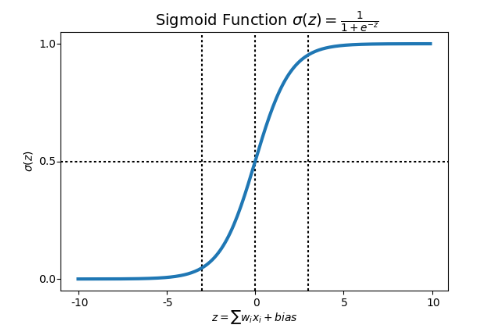

클래스 1에 속할 확률 p를 로짓변환을 해줘서 선형적인 값(z=w^tx+...)들로 변환한다.

 이를 인풋값으로하는 시그모이드 함수에 대입하면 확률 P를 얻을 수 있음.

##경계선 그래프 그려보기

Logistic Regression 정확도: 100.00%


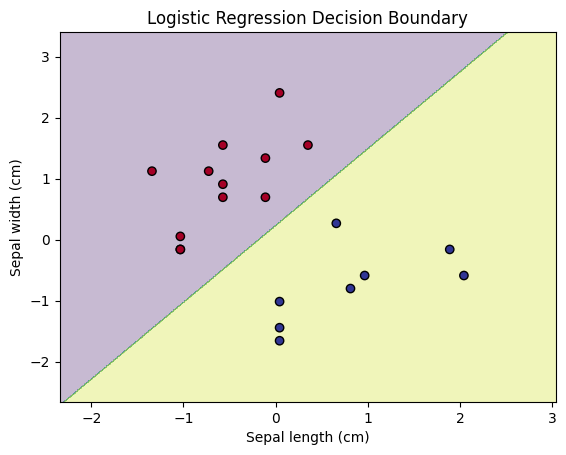

In [ ]:
# 두 개의 피처 선택
X = binary_df[['sepal length (cm)', 'sepal width (cm)']]  # 두 개의 피처 선택
y = binary_df['label']

# 데이터 분리 (훈련 셋과 테스트 셋)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습 (두 개의 피처 사용)
logistic_model_2features = LogisticRegression(max_iter=1000)
logistic_model_2features.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = logistic_model_2features.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression 정확도: {accuracy * 100:.2f}%")

# 결정 경계 시각화 함수 정의
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Sepal width (cm)')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

# 결정 경계 시각화
plot_decision_boundary(X_test, y_test, logistic_model_2features)

##📑
로지스틱 회귀 모델에서 더 높은 정확도를 얻을 수 있었음.

이유는 시그모이드 함수와 로그 손실 함수를 사용하여 확률 기반 예측을 수행하며, 비선형 데이터에도 더 잘 대응할 수 있기 때문.

 ADALINE은 선형 결정 경계만 찾을 수 있어, 비선형 데이터에서는 성능이 저하될 수 있겠다.